In [1]:
import numpy as np
import pandas as pd
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import shutil
from sklearn.metrics import confusion_matrix, classification_report

In [111]:
train_df = pd.read_csv('capstone covid data/train.txt', sep=" ", header=None)

In [112]:
train_df.columns=['patient id', 'filename', 'class', 'data source']

In [113]:
train_df=train_df.drop(['patient id', 'data source'], axis=1 )

In [114]:
train_df.head()

,filename,class
0,ARDSSevere.png,negative
1,acute-respiratory-distress-syndrome-ards-1.jpg,negative
2,acute-respiratory-distress-syndrome-ards.jpg,negative
3,ards-secondary-to-tiger-snake-bite.png,negative
4,pneumocystis-pneumonia-2-PA.png,negative


In [115]:
test_df = pd.read_csv('Capstone covid data/test.txt', sep=" ", header=None)
test_df.columns=['id', 'filename', 'class', 'data source' ]
test_df=test_df.drop(['id', 'data source'], axis=1 )

In [116]:
test_df.head()

,filename,class
0,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive
1,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive
2,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive
3,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive
4,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive


In [117]:
train_df['class'].value_counts()

negative    13793
positive     2158
Name: class, dtype: int64

In [118]:
negative  = train_df[train_df['class']=='negative']  
positive = train_df[train_df['class']=='positive'] 
from sklearn.utils import resample

df_majority_downsampled = resample(negative, replace = True, n_samples = 2158) 

train_df = pd.concat([positive, df_majority_downsampled])

from sklearn.utils import shuffle
train_df = shuffle(train_df) 

In [119]:
train_df['class'].value_counts()

negative    2158
positive    2158
Name: class, dtype: int64

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image 

In [12]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [121]:
train_df, valid_df = train_test_split(train_df, train_size=0.9, random_state=0)

In [122]:
print(f"Negative and positive values of train: {train_df['class'].value_counts()}")
print(f"Negative and positive values of validation: {valid_df['class'].value_counts()}")
print(f"Negative and positive values of test: {test_df['class'].value_counts()}")

Negative and positive values of train: negative    1950
positive    1934
Name: class, dtype: int64
Negative and positive values of validation: positive    224
negative    208
Name: class, dtype: int64
Negative and positive values of test: negative    200
positive    200
Name: class, dtype: int64


In [123]:
train_path = 'Capstone covid data/train'  #directory path
test_path = 'Capstone covid data/test'

In [124]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [125]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_df, directory=train_path, x_col='filename', 
                                              y_col='class', target_size=(224,224), batch_size=64, 
                                               class_mode='binary')
valid_gen = test_datagen.flow_from_dataframe(dataframe = valid_df, directory=train_path, x_col='filename',
                                             y_col='class', target_size=(224,224), batch_size=64, 
                                            class_mode='binary')
test_gen = test_datagen.flow_from_dataframe(dataframe = test_df, directory=test_path, x_col='filename', 
                                            y_col='class', target_size=(224,224), batch_size=64,
                                             class_mode='binary')


Found 3884 validated image filenames belonging to 2 classes.
Found 432 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


In [126]:
train_gen.class_indices

{'negative': 0, 'positive': 1}

In [25]:
hist = model.fit_generator(
    train_gen,
    epochs = 20,
    validation_data = valid_gen,
)

Epoch 1/20
61/61 [==============================] - 478s 8s/step - loss: 0.6891 - accuracy: 0.6087 - val_loss: 0.6012 - val_accuracy: 0.7153
Epoch 2/20
61/61 [==============================] - 483s 8s/step - loss: 0.6086 - accuracy: 0.6746 - val_loss: 0.6096 - val_accuracy: 0.6852
Epoch 3/20
61/61 [==============================] - 482s 8s/step - loss: 0.5605 - accuracy: 0.7176 - val_loss: 0.5231 - val_accuracy: 0.7176
Epoch 4/20
61/61 [==============================] - 472s 8s/step - loss: 0.5376 - accuracy: 0.7289 - val_loss: 0.4702 - val_accuracy: 0.7778
Epoch 5/20
61/61 [==============================] - 468s 8s/step - loss: 0.5068 - accuracy: 0.7629 - val_loss: 0.4889 - val_accuracy: 0.7755
Epoch 6/20
61/61 [==============================] - 465s 8s/step - loss: 0.4768 - accuracy: 0.7804 - val_loss: 0.4006 - val_accuracy: 0.8009
Epoch 7/20
61/61 [==============================] - 461s 8s/step - loss: 0.4692 - accuracy: 0.7873 - val_loss: 0.6101 - val_accuracy: 0.7986
Epoch 8/20
61

In [26]:
model.evaluate_generator(train_gen)

[0.3611181080341339, 0.8931514024734497]

In [27]:
model.evaluate_generator(valid_gen)

[0.3568831980228424, 0.8657407164573669]

In [28]:
model.save('CNN_model_covid.h5')

In [18]:
model=load_model('CNN_model_covid.h5')

In [23]:
model.evaluate_generator(test_gen)

[0.26798686385154724, 0.8924999833106995]

In [ ]:
train_df.

In [22]:
import math
img_path="Capstone covid data/test/0103fadb-1663-40a6-8a9e-09d626cd2091.png"
i = image.load_img(img_path, target_size=(224,224))
i = image.img_to_array(i)/255.0
i = i.reshape(1, 224,224,3)
p = model.predict(i)
print(math.floor(p[0][0]/0.5))

0


In [20]:
p

array([[0.02258947]], dtype=float32)

In [65]:
train_gen.class_indices

{'negative': 0, 'positive': 1}

In [51]:
y=np.array(test_df['class'].tolist())

In [52]:
y_actual=[]
y_test=[]

In [53]:
for i in range(len(y)):
    if(y[i]=='negative'):
        y_actual.append(0)
    elif(y[i]=='positive'):
        y_actual.append(1)
    else:
        print('error')
        break

In [54]:
len(y_actual)

400

In [55]:
for j in range (len(test_df.filename)):
    img_path="Capstone covid data/test/"+test_df.filename.array[j]
    i = image.load_img(img_path, target_size=(224,224))
    i = image.img_to_array(i)/255.0
    i = i.reshape(1, 224,224,3)
    p=model.predict(i)
    if(p[0][0]>0.5):
        y_test.append(1)
    else:
        y_test.append(0)

In [91]:
# y_test

In [57]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm= confusion_matrix(y_actual,y_test)

In [66]:
import seaborn as sns
classes = ("negative", "positive")
CATEGORIES = sorted(classes)

<AxesSubplot:>

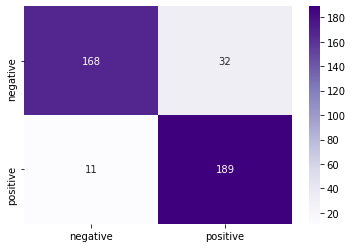

In [67]:
sns.heatmap(cm,annot=True, fmt="d",cmap="Purples", xticklabels=CATEGORIES, yticklabels=CATEGORIES)

In [68]:
import sklearn
sklearn.metrics.accuracy_score(y_actual, y_test, normalize=True, sample_weight=None)

0.8925

In [127]:
# Validation

In [128]:
y=np.array(valid_df['class'].tolist())

In [129]:
y_actual=[]
y_test=[]

In [130]:
for i in range(len(y)):
    if(y[i]=='negative'):
        y_actual.append(0)
    elif(y[i]=='positive'):
        y_actual.append(1)
    else:
        print('error')
        break

In [131]:
len(y_actual)

432

In [132]:
for j in range (len(valid_df.filename)):
    img_path="Capstone covid data/train/"+valid_df.filename.array[j]
    i = image.load_img(img_path, target_size=(224,224))
    i = image.img_to_array(i)/255.0
    i = i.reshape(1, 224,224,3)
    p=model.predict(i)
    if(p[0][0]>0.5):
        y_test.append(1)
    else:
        y_test.append(0)

In [133]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [134]:
from sklearn.metrics import confusion_matrix

In [135]:
cm= confusion_matrix(y_actual,y_test)

In [136]:
import seaborn as sns
classes = ("negative", "positive")
CATEGORIES = sorted(classes)

<AxesSubplot:>

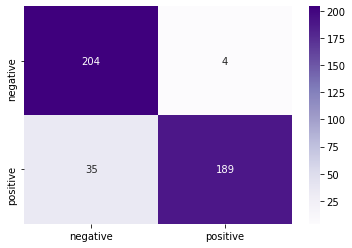

In [137]:
sns.heatmap(cm,annot=True, fmt="d",cmap="Purples", xticklabels=CATEGORIES, yticklabels=CATEGORIES)

In [138]:
import sklearn
sklearn.metrics.accuracy_score(y_actual, y_test, normalize=True, sample_weight=None)

0.9097222222222222

In [ ]:
##RESNET

In [69]:
import numpy as np
import pandas as pd
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import shutil
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
train_df = pd.read_csv('capstone covid data/train.txt', sep=" ", header=None)

In [71]:
train_df.columns=['patient id', 'filename', 'class', 'data source']

In [72]:
train_df=train_df.drop(['patient id', 'data source'], axis=1 )

In [73]:
train_df.head()

,filename,class
0,ARDSSevere.png,negative
1,acute-respiratory-distress-syndrome-ards-1.jpg,negative
2,acute-respiratory-distress-syndrome-ards.jpg,negative
3,ards-secondary-to-tiger-snake-bite.png,negative
4,pneumocystis-pneumonia-2-PA.png,negative


In [74]:
test_df = pd.read_csv('Capstone covid data/test.txt', sep=" ", header=None)
test_df.columns=['id', 'filename', 'class', 'data source' ]
test_df=test_df.drop(['id', 'data source'], axis=1 )

In [75]:
test_df.head()

,filename,class
0,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive
1,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive
2,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive
3,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive
4,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive


In [76]:
negative  = train_df[train_df['class']=='negative']  
positive = train_df[train_df['class']=='positive'] 
from sklearn.utils import resample

df_majority_downsampled = resample(negative, replace = True, n_samples = 2158) 

train_df = pd.concat([positive, df_majority_downsampled])

from sklearn.utils import shuffle
train_df = shuffle(train_df) 

In [77]:
train_df['class'].value_counts()

negative    2158
positive    2158
Name: class, dtype: int64

In [78]:
train_df, valid_df = train_test_split(train_df, train_size=0.9, random_state=0)

In [79]:
print(f"Negative and positive values of train: {train_df['class'].value_counts()}")
print(f"Negative and positive values of validation: {valid_df['class'].value_counts()}")
print(f"Negative and positive values of test: {test_df['class'].value_counts()}")

Negative and positive values of train: negative    1944
positive    1940
Name: class, dtype: int64
Negative and positive values of validation: positive    218
negative    214
Name: class, dtype: int64
Negative and positive values of test: negative    200
positive    200
Name: class, dtype: int64


In [80]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [81]:
train_path = 'Capstone covid data/train'  #directory path
test_path = 'Capstone covid data/test'

In [82]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_df, directory=train_path, x_col='filename', 
                                              y_col='class', target_size=(224,224), batch_size=64, 
                                               class_mode='binary')
valid_gen = test_datagen.flow_from_dataframe(dataframe = valid_df, directory=train_path, x_col='filename',
                                             y_col='class', target_size=(224,224), batch_size=64, 
                                            class_mode='binary')
test_gen = test_datagen.flow_from_dataframe(dataframe = test_df, directory=test_path, x_col='filename', 
                                            y_col='class', target_size=(224,224), batch_size=64,
                                             class_mode='binary')

Found 3884 validated image filenames belonging to 2 classes.
Found 432 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


In [83]:
import tensorflow as tf

base_model = tf.keras.applications.ResNet50V2(weights='imagenet', input_shape = (224,224,3),
                                                     include_top=False)
for layer in base_model.layers:
    layer.trainable = False

In [19]:
model = tf.keras.Sequential([
    base_model, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 23,827,713
Trainable params: 262,657
Non-trainable params: 23,565,056
____________________________________

In [22]:
history = model.fit_generator(train_gen, 
                    validation_data=valid_gen, epochs=20, 
                    )

C:\Users\mayan\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 613s 10s/step - loss: 0.3528 - accuracy: 0.8579 - val_loss: 0.4827 - val_accuracy: 0.7917
Epoch 2/20
61/61 [==============================] - 659s 11s/step - loss: 0.2536 - accuracy: 0.8975 - val_loss: 0.3979 - val_accuracy: 0.8333
Epoch 3/20
61/61 [==============================] - 733s 12s/step - loss: 0.2267 - accuracy: 0.9086 - val_loss: 0.2444 - val_accuracy: 0.9097
Epoch 4/20
61/61 [==============================] - 647s 11s/step - loss: 0.2106 - accuracy: 0.9225 - val_loss: 0.2585 - val_accuracy: 0.9051
Epoch 5/20
61/61 [==============================] - 430s 7s/step - loss: 0.1955 - accuracy: 0.9238 - val_loss: 0.3194 - val_accuracy: 0.8912
Epoch 6/20
61/61 [==============================] - 434s 7s/step - loss: 0.1943 - accuracy: 0.9181 - val_loss: 0.2372 - val_accuracy: 0.9120
Epoch 7/20
61/61 [==============================] - 444s 7s/step - loss: 0.1836 - accuracy: 0.9305 - val_loss: 0.2106 - val_accuracy: 0.9190
Epoch 8/2

In [23]:
model.save('ResNet_model_covid.h5')

C:\Users\mayan\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [24]:
model.evaluate_generator(valid_gen)

C:\Users\mayan\Anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.34622111916542053, 0.8865740895271301]

In [25]:
model.evaluate_generator(train_gen)

[0.14175935089588165, 0.9436148405075073]

In [26]:
model.evaluate_generator(test_gen)

[0.5586373805999756, 0.8025000095367432]

In [84]:
model=load_model('ResNet_model_covid.h5')

In [1]:
# import math
# img_path="Capstone covid data/test/0103fadb-1663-40a6-8a9e-09d626cd2091.png"
# i = image.load_img(img_path, target_size=(224,224))
# i = image.img_to_array(i)/255.0
# i = i.reshape(1, 224,224,3)
# p = model.predict(i)

In [86]:
i

array([[0.00017378]], dtype=float32)

In [88]:
y_actual=[]
y_test=[]

In [89]:
y=np.array(test_df['class'].tolist())

In [90]:
for i in range(len(y)):
    if(y[i]=='negative'):
        y_actual.append(0)
    elif(y[i]=='positive'):
        y_actual.append(1)
    else:
        print('error')
        break

In [92]:
len(y_actual)

400

In [93]:
for j in range (len(test_df.filename)):
    img_path="Capstone covid data/test/"+test_df.filename.array[j]
    i = image.load_img(img_path, target_size=(224,224))
    i = image.img_to_array(i)/255.0
    i = i.reshape(1, 224,224,3)
    p=model.predict(i)
    if(p[0][0]>0.5):
        y_test.append(1)
    else:
        y_test.append(0)

In [94]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
cm= confusion_matrix(y_actual,y_test)

In [97]:
import seaborn as sns
classes = ("negative", "positive")
CATEGORIES = sorted(classes)

<AxesSubplot:>

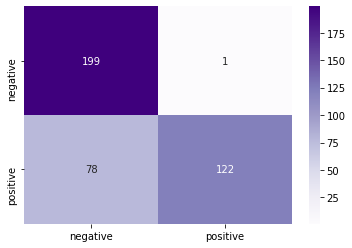

In [98]:
sns.heatmap(cm,annot=True, fmt="d",cmap="Purples", xticklabels=CATEGORIES, yticklabels=CATEGORIES)

In [99]:
import sklearn
sklearn.metrics.accuracy_score(y_actual, y_test, normalize=True, sample_weight=None)

0.8025

In [100]:
# validation 

In [101]:
y=np.array(valid_df['class'].tolist())

In [102]:
y_actual=[]
y_test=[]

In [103]:
for i in range(len(y)):
    if(y[i]=='negative'):
        y_actual.append(0)
    elif(y[i]=='positive'):
        y_actual.append(1)
    else:
        print('error')
        break

In [104]:
len(y_actual)

432

In [106]:
for j in range (len(valid_df.filename)):
    img_path="Capstone covid data/train/"+valid_df.filename.array[j]
    i = image.load_img(img_path, target_size=(224,224))
    i = image.img_to_array(i)/255.0
    i = i.reshape(1, 224,224,3)
    p=model.predict(i)
    if(p[0][0]>0.5):
        y_test.append(1)
    else:
        y_test.append(0)

In [107]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [108]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_actual,y_test)
import seaborn as sns
classes = ("negative", "positive")
CATEGORIES = sorted(classes)

<AxesSubplot:>

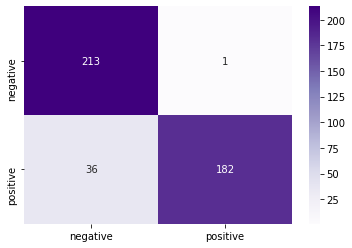

In [109]:
sns.heatmap(cm,annot=True, fmt="d",cmap="Purples", xticklabels=CATEGORIES, yticklabels=CATEGORIES)

In [110]:
import sklearn
sklearn.metrics.accuracy_score(y_actual, y_test, normalize=True, sample_weight=None)

0.9143518518518519